In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.layers import Conv2D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ds, info = tfds.load('mnist', split='train', with_info=True)

In [3]:
ds

<PrefetchDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

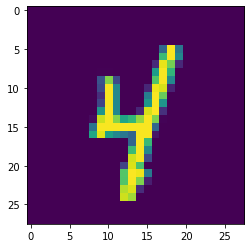

In [4]:
img = np.array(np.squeeze(tfds.as_dataframe(ds.take(1), info)['image'][0]) / 255, dtype=np.float32)
plt.imshow(img)
plt.show()

In [5]:
conv = Conv2D(1, (3,3), activation='elu', input_shape=(28,28))

In [6]:
c_img = np.array(tf.squeeze(conv(img.reshape(1,28,28,1))))

In [7]:
c_img.shape

(26, 26)

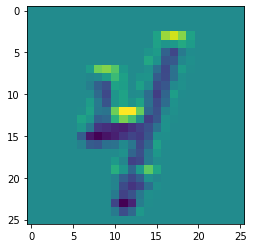

In [8]:
plt.imshow(c_img)
plt.show()

In [9]:
conv = Conv2D(20, (3,3), activation='elu', input_shape=(28,28))

In [10]:
c_img = np.array(tf.squeeze(conv(img.reshape(1,28,28,1))))

In [11]:
c_img.shape

(26, 26, 20)

In [12]:
c_imgs = []
for i in range(c_img.shape[-1]):
    c_imgs.append(c_img[:, :, i])

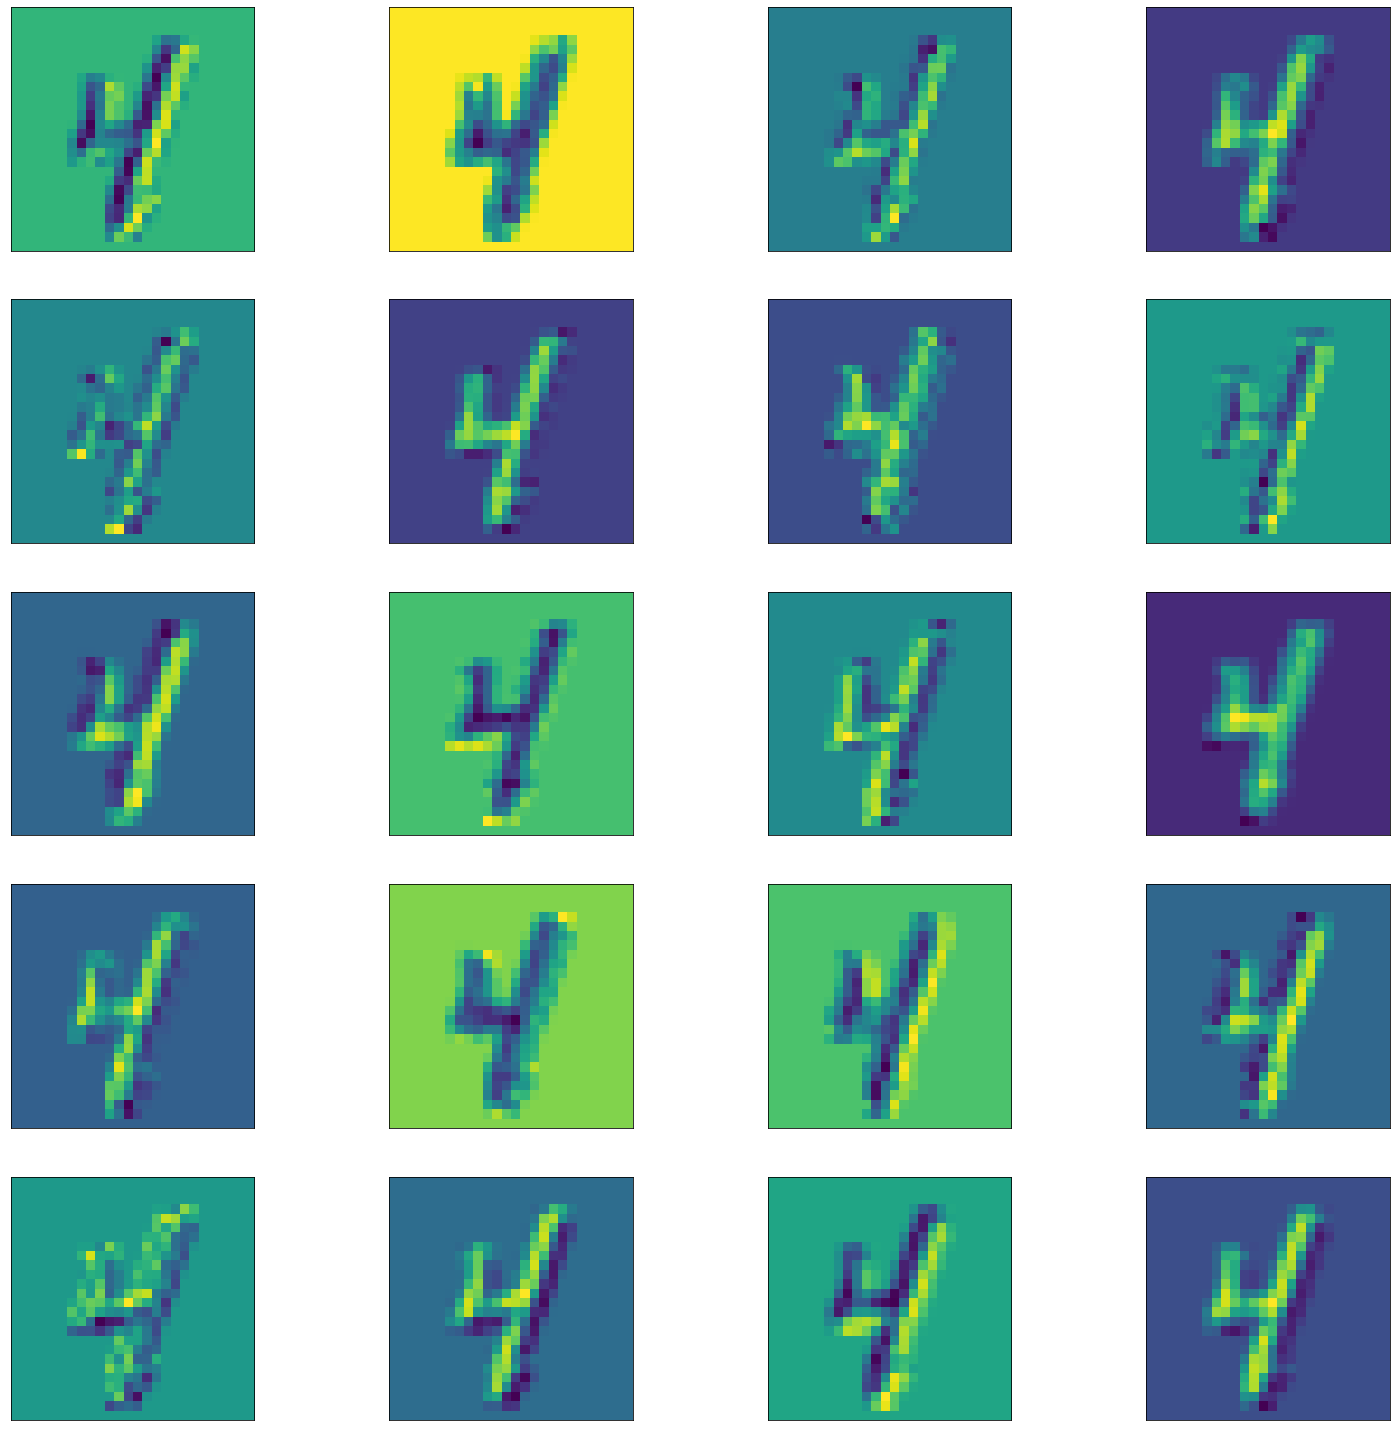

In [13]:
fig, axs = plt.subplots(5, 4, figsize=(26,26))

for i, ax in enumerate(axs.flat):
    ax.imshow(c_imgs[i])
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
plt.show()